In [220]:
import pandas as pd

# Define the file path
file_path = r"/Users/gracehoopingarner/Documents/Chico Green City Analysis/9.6.2024_Monetary_Contributions.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
# df.head()

# Define the list of organizations you're interested in
party_A_filters = ["A Better Chico", 
                "O'Brien For City Council 2024", 
                "Tandon for Chico City Council 2024",
                "Bennett for City Council 2024"]
                #"Yes on O & P - Friends of Chico's Affordable Homes & Neighborhoods, sponsored by Believe in Chico, LLC"]
party_B_filters = ["Stand Up for Chico",
               "Bryce Goldstein For Chico City Council 2024",
               "Katie Hawley for Chico City Council District 5 2024",
               "Mc Daniel for City Council 2024",
               "Stop Valley's Edge"]

# Create a new DataFrame that filters rows where the organization matches one of the names in the list
party_A_contributionss = df[df['Filer'].isin(party_A_filters)]
party_B_contributions = df[df['Filer'].isin(party_B_filters)]

# Drop columns that contain "_" in their column names from party_A_contributionss
party_A_contributionss_cleaned = party_A_contributionss.drop(columns=[col for col in party_A_contributionss.columns if "_" in col]).fillna("")

# Display the cleaned DataFrame
# party_A_contributionss_cleaned.head()

# Group by the ContributorCode and calculate the count and sum
summary_df = party_A_contributionss_cleaned.groupby('ContributorCode').agg(
    Count=('ContributorCode', 'size'),
    TotalAmount=('AmountReceivedThisPeriod', 'sum')
).reset_index()

# Display the resulting summary DataFrame
summary_df.head()

# IND - Individual
# COM - Recipient Committee (other than PTY or SCC)
# OTH - Other (business entity)
# PTY - Political Party
# SCC - Small Contributor Committee


,ContributorCode,Count,TotalAmount
0,COM,5,9700.0
1,IND,157,86858.0
2,OTH,32,47543.0
3,SCC,4,3000.0


In [221]:
companies = party_A_contributionss[(party_A_contributionss['ContributorNameFirst'] == '') | (party_A_contributionss['ContributorNameFirst'].isna())]
companies = companies.dropna(axis=1, how='all')


# Group by 'ContributorNameLast' and sum the 'AmountReceivedThisPeriod' for each group
total_spent_by_company = companies.groupby('ContributorNameLast')['AmountReceivedThisPeriod'].sum().reset_index()

# Rename the columns for clarity
total_spent_by_company.columns = ['ContributorNameLast', 'TotalAmountReceived']

total_spent_by_company = total_spent_by_company.sort_values(by='TotalAmountReceived', ascending=False)

# Display the result
display(total_spent_by_company)

#cabinet, construction, door, glass, paint, McMurray
#properties, rent, development, epick
#wealth, financial

,ContributorNameLast,TotalAmountReceived
23,Oak Ridge Cabinets,10200.0
12,Fast Cabinet Doors,7800.0
0,AAA Properties,5000.0
10,Chico Police Officers Association,5000.0
14,Gallagher for Assembly 2024,5000.0
3,"Bill Webb Construction, Inc.",5000.0
7,California Water Service State & Local Politic...,3700.0
25,Peace Officers Research Association of Califor...,3000.0
19,MacMurray Pacific,2500.0
1,"Advanced Door Company, Inc.",2000.0


In [222]:
grouped_contributors = party_A_contributionss.groupby('ContributorNameLast')['AmountReceivedThisPeriod'].sum().reset_index()
grouped_contributors = grouped_contributors.sort_values(by='AmountReceivedThisPeriod', ascending=False)
pd.set_option('display.max_rows', None)
display(grouped_contributors)

,ContributorNameLast,AmountReceivedThisPeriod
76,MacNeill,11140.0
89,Oak Ridge Cabinets,10200.0
48,Fast Cabinet Doors,7800.0
121,Van Overbeek,6125.0
0,AAA Properties,5000.0
54,Gallagher for Assembly 2024,5000.0
27,Chico Police Officers Association,5000.0
9,"Bill Webb Construction, Inc.",5000.0
20,California Water Service State & Local Politic...,3700.0
94,Peace Officers Research Association of Califor...,3000.0


In [223]:
# Filter out the contributors that appear in the 'ContributorNameLast' column of 'total_spent_by_company'
individual_contributors = grouped_contributors[~grouped_contributors['ContributorNameLast'].isin(total_spent_by_company['ContributorNameLast'])]

# Display the resulting dataframe
display(individual_contributors)


,ContributorNameLast,AmountReceivedThisPeriod
76,MacNeill,11140.0
121,Van Overbeek,6125.0
88,Novak,3000.0
22,Callery,2500.0
107,Shelton,2500.0
99,Pool,2500.0
41,Dodds,2000.0
23,Campbell-Bennett,2000.0
51,Francis,2000.0
110,Sorenson,1800.0


In [224]:
import numpy as np
import re

construction_keywords = ['cabinet', 'construction', 'door', 'glass', 'paint', 'macmurray','mcmurray']
real_estate_keywords = ['properties', 'rent', 'development', 'epick']
#financial_services_keywords = ['wealth', 'financial']
party_A_donors_keywords = ['political action committee','for']

# Function to classify based on keywords
def classify_category(name):
    name_lower = name.lower()  # Convert to lowercase to make the search case-insensitive
    if any(keyword in name_lower for keyword in party_A_donors_keywords):
        return 'Republican Donors'
    elif any(keyword in name_lower for keyword in construction_keywords):
        return 'Construction'
    elif any(keyword in name_lower for keyword in real_estate_keywords):
        return 'Real Estate'
    #elif any(keyword in name_lower for keyword in financial_services_keywords):
    #    return 'Financial Services'
    elif any(keyword in name_lower for keyword in pac_keywords):
        return 'PAC'
    else:
        #return name
        return 'Other'

# Apply the function to create a new category column
total_spent_by_company['Category'] = total_spent_by_company['ContributorNameLast'].apply(classify_category)

# Aggregate the total sum for each category
aggregated_totals_companies = total_spent_by_company.groupby('Category')['TotalAmountReceived'].sum().reset_index()
aggregated_totals_companies = aggregated_totals_companies.sort_values(by='TotalAmountReceived', ascending=False)

# Display the aggregated totals
display(aggregated_totals_companies)

,Category,TotalAmountReceived
0,Construction,30820.0
3,Republican Donors,12700.0
1,Other,8725.0
2,Real Estate,7998.0


In [244]:
import pandas as pd

# Function to classify contributors based on AmountReceivedThisPeriod
def classify_contributor(amount):
    if amount >= 2000:
        return 'Large Individual Contributors (Greater than $2000)'
    elif 500 <= amount < 2000:
        return 'Medium Individual Contributors'
    else:
        return 'Small Individual Contributors (Less than $500)'

# Apply the function to create a new category column
individual_contributors['ContributorCategory'] = individual_contributors['AmountReceivedThisPeriod'].apply(classify_contributor)

# Group by the new category and aggregate the count and total amount received
contributor_summary = individual_contributors.groupby('ContributorCategory').agg(
    Count=('AmountReceivedThisPeriod', 'size'),
    TotalAmountReceived=('AmountReceivedThisPeriod', 'sum')
).reset_index()

# Display the summary
display(contributor_summary)


/var/folders/xx/9k63gvxx6jd2whcrcpq_vj8h0000gn/T/ipykernel_11142/2680726831.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_contributors['ContributorCategory'] = individual_contributors['AmountReceivedThisPeriod'].apply(classify_contributor)


,ContributorCategory,Count,TotalAmountReceived
0,Large Individual Contributors (Greater than $2...,9,33765.0
1,Medium Individual Contributors,39,43458.0
2,Small Individual Contributors (Less than $500),59,9635.0


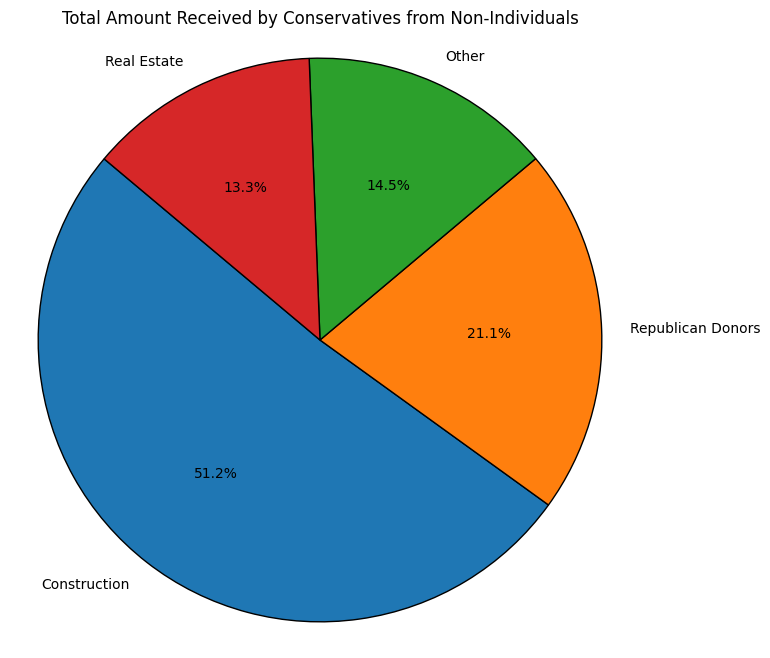

In [226]:
import matplotlib.pyplot as plt

labels_companies = aggregated_totals_companies['Category']
sizes_companies = aggregated_totals_companies['TotalAmountReceived']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size to make it look good
plt.pie(sizes_companies, labels=labels_companies, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Total Amount Received by party_A from Non-Individuals')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


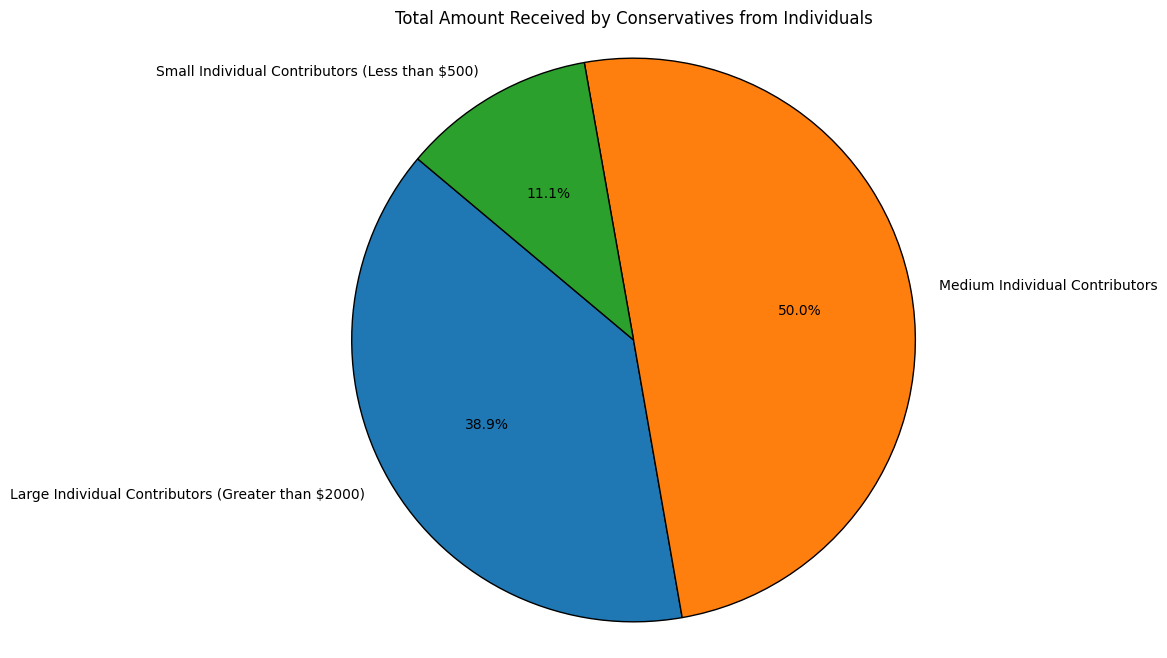

In [245]:
labels_ind = contributor_summary['ContributorCategory']
sizes_ind = contributor_summary['TotalAmountReceived']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size to make it look nice
plt.pie(sizes_ind, labels=labels_ind, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Total Amount Received by party_A from Individuals')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

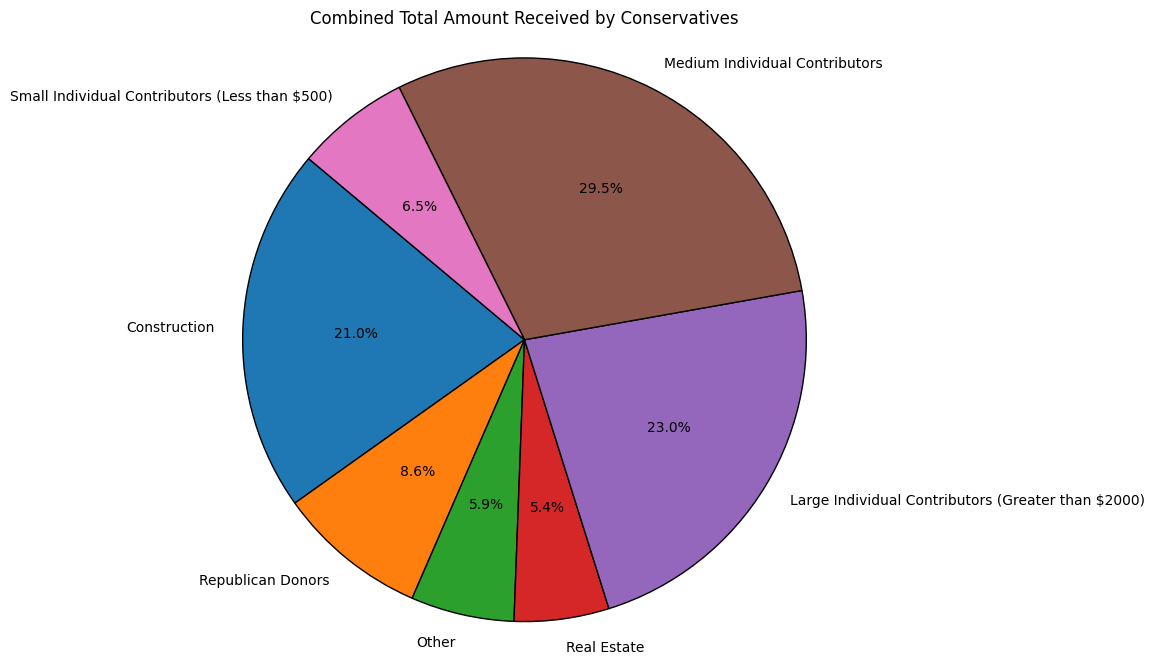

In [246]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine the two dataframes
combined_df = pd.concat([
    aggregated_totals_companies[['Category', 'TotalAmountReceived']].rename(columns={'Category': 'Label'}),
    contributor_summary[['ContributorCategory', 'TotalAmountReceived']].rename(columns={'ContributorCategory': 'Label'})
])

# Extract the labels and sizes from the combined dataframe
labels_combined = combined_df['Label']
sizes_combined = combined_df['TotalAmountReceived']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size to make it look good
plt.pie(sizes_combined, labels=labels_combined, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Combined Total Amount Received by party_A')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


In [229]:
import pandas as pd

# Group by 'ContributorState' and sum the 'AmountReceivedThisPeriod' for each state
total_by_city = party_A_contributionss.groupby('ContributorCity')['AmountReceivedThisPeriod'].sum().reset_index()

# Rename columns for clarity (optional)
total_by_city.columns = ['ContributorCity', 'TotalAmountReceived']

def classify_city(city):
    within_30_miles = ['Butte Valley', 'Durham', 'Forest Ranch', 'Magalia','Marysville', 'Oroville', 'Paradise', 'Yankee Hill']
    if city in within_30_miles:
        return 'Within 30 miles of Chico'
    elif city == 'Chico':
        return 'Chico'
    else:
        return 'Other'

# Apply the classification function to create a new category column
total_by_city['CityCategory'] = total_by_city['ContributorCity'].apply(classify_city)

# Display the grouped totals
print(total_by_city)


   ContributorCity  TotalAmountReceived              CityCategory
0         Antelope                 20.0                     Other
1     Butte Valley               2000.0  Within 30 miles of Chico
2            Chico             116486.0                     Chico
3           Durham               2090.0  Within 30 miles of Chico
4           Fresno                500.0                     Other
5     Grass Valley                500.0                     Other
6          Magalia               1500.0  Within 30 miles of Chico
7       Marysville                 75.0  Within 30 miles of Chico
8      Morgan Hill               2500.0                     Other
9         Murrieta               1500.0                     Other
10      Orangevale               1000.0                     Other
11        Oroville                125.0  Within 30 miles of Chico
12       Penngrove               1000.0                     Other
13          Penryn                305.0                     Other
14      Sa

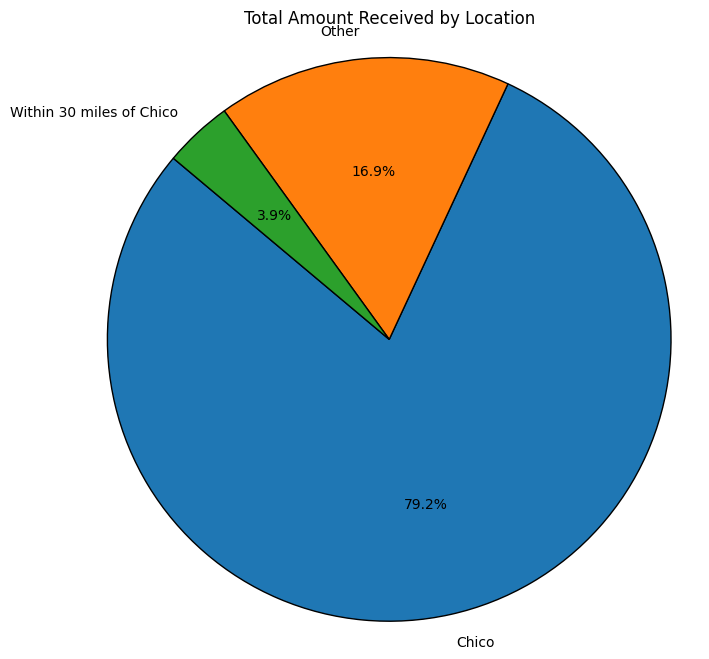

In [247]:
grouped_totals = total_by_city.groupby('CityCategory')['TotalAmountReceived'].sum().reset_index()

# Extract the labels and sizes for the pie chart
labels = grouped_totals['CityCategory']
sizes = grouped_totals['TotalAmountReceived']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Total Amount Received by party_As by Location')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

In [231]:
import pandas as pd

# Group by 'ContributorCity' and sum the 'AmountReceivedThisPeriod' for each city
total_by_city_party_B = party_B_contributions.groupby('ContributorCity')['AmountReceivedThisPeriod'].sum().reset_index()

# Rename columns for clarity (optional)
total_by_city_party_B.columns = ['ContributorCity', 'TotalAmountReceived']

# Convert 'ContributorCity' column to lowercase
total_by_city_party_B['ContributorCity'] = total_by_city_party_B['ContributorCity'].str.lower()

# Group by 'ContributorCity' again (though this step may not be necessary unless there are further duplicates)
total_by_city_party_B = total_by_city_party_B.groupby('ContributorCity', as_index=False).sum()

# Define the classification function
def classify_city_two(city):
    within_30_miles = ['butte valley', 'durham', 'forest ranch', 'magalia', 'oroville', 'paradise', 'yankee hill']
    if city in within_30_miles:
        return 'Within 30 miles of Chico'
    elif city == 'chico':
        return 'Chico'
    else:
        return 'Other'

# Apply the classification function to create a new category column
total_by_city_party_B['CityCategory'] = total_by_city_party_B['ContributorCity'].apply(classify_city_two)

# Display the grouped totals
display(total_by_city_party_B)


,ContributorCity,TotalAmountReceived,CityCategory
0,auburn,25.0,Other
1,berkeley,100.0,Other
2,berkley,25.0,Other
3,broomfield,800.0,Other
4,butte valley,25.0,Within 30 miles of Chico
5,chico,54097.0,Chico
6,durham,825.0,Within 30 miles of Chico
7,forest ranch,300.0,Within 30 miles of Chico
8,grass valley,20.0,Other
9,magalia,70.0,Within 30 miles of Chico


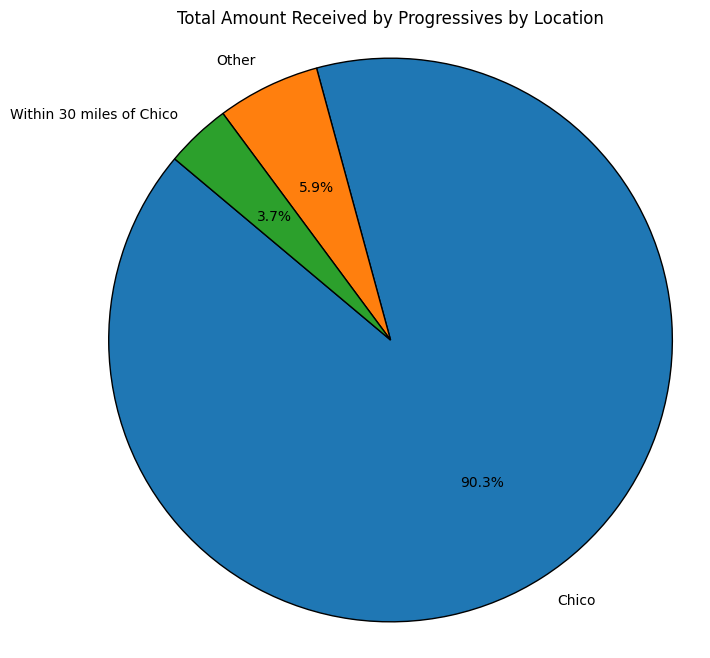

In [248]:
import matplotlib.pyplot as plt

# Assuming 'total_by_city_party_B' has columns 'CityCategory' and 'TotalAmountReceived'

# Group by 'CityCategory' and sum 'TotalAmountReceived' (if not already done)
grouped_totals = total_by_city_party_B.groupby('CityCategory')['TotalAmountReceived'].sum().reset_index()

# Extract the labels and sizes for the pie chart
labels = grouped_totals['CityCategory']
sizes = grouped_totals['TotalAmountReceived']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Total Amount Received by party_Bs by Location')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


In [250]:
import pandas as pd

# Calculate the total for 'AmountReceivedThisPeriod' from both dataframes
total_party_A_contributionss = party_A_contributionss['AmountReceivedThisPeriod'].sum()
total_party_B_contributions = party_B_contributions['AmountReceivedThisPeriod'].sum()

# Create a new dataframe to store the totals
totals_df = pd.DataFrame({
    'DataFrame': ['party_A_contributions', 'party_B_contributions'],
    'TotalAmountReceived': [total_party_A_contributionss, total_party_B_contributions]
})

totals_df['DataFrame'] = totals_df['DataFrame'].replace({
    'party_A_contributions': 'Contributions Received by party_As',
    'party_B_contributions': 'Contributions Received by party_Bs'
})

# Display the totals dataframe
print(totals_df)


                                 DataFrame  TotalAmountReceived
0  Contributions Received by party_As             147101.0
1   Contributions Received by party_Bs              59882.0


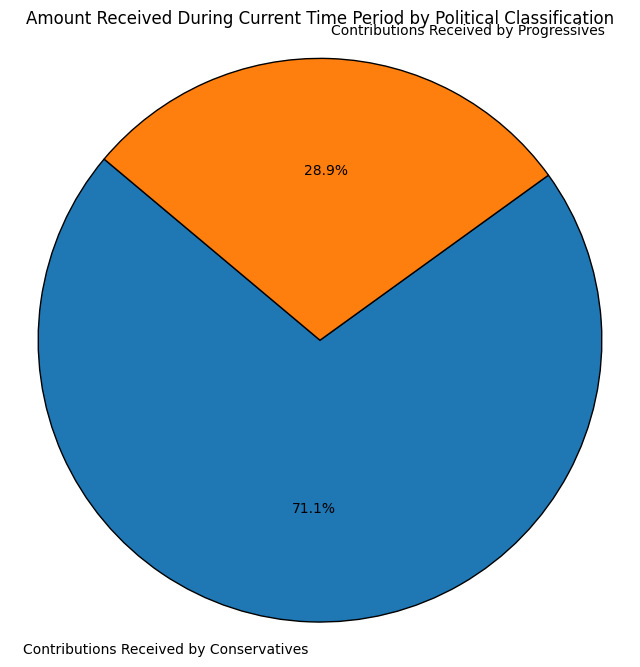

In [253]:
import matplotlib.pyplot as plt

# Assuming 'totals_df' is the dataframe containing the totals
labels = totals_df['DataFrame']
sizes = totals_df['TotalAmountReceived']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Amount Received During Current Time Period by Political Classification')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()
